# Exploratory Data Analysis
- Visualizing the Number of Jobs filtered By the country
- Visualizing Facilities Provided companies in the country
- Visualizing the Job Posting Done By Companies

In [15]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The DataSet From The HuggingFace
- This dataset consists of job postings from the LinkedIn from 2023-2024

In [16]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


### Data Cleanup

In [17]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.loc[0,'job_posted_date']

Timestamp('2023-06-16 13:44:15')

In [18]:
def clean_job_skills(val):
    if pd.notna(val):
        return ast.literal_eval(val)

df['job_skills'] = df['job_skills'].apply(clean_job_skills)

### Filtering by the requirements

In [19]:
country = 'India'
job_type = 'Data Analyst'
top = 10

In [20]:
df_filtered_country = df[(df['job_country'] == country) & (df['job_title_short'] == job_type)]
df_filtered_country

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


# Plotting The Data

In [21]:
df_filtered_plot = (
    df_filtered_country['job_location']
    .value_counts()
    .head(top)
    .to_frame()
    .copy()
)
df_filtered_plot

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


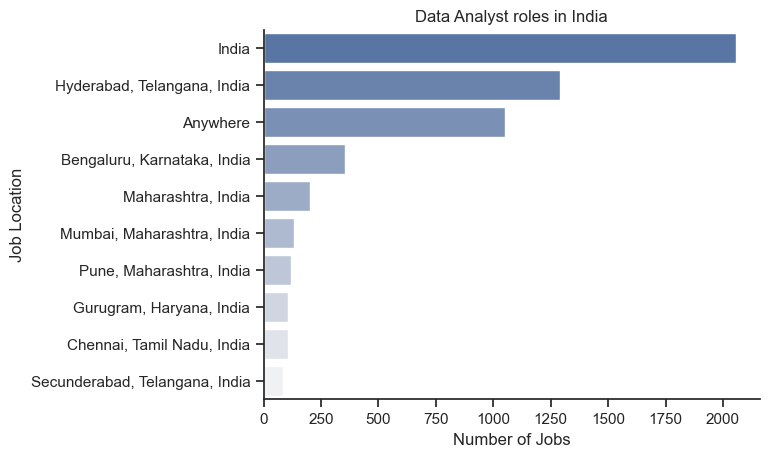

In [22]:
sns.barplot(
    data= df_filtered_plot, 
    x= 'count', 
    y= 'job_location',
    hue = 'job_location',
    palette= 'light:b_r',
)
sns.set_theme(style= 'ticks')
plt.xlabel(f'Number of Jobs')
plt.ylabel(f'Job Location')
plt.title(f'{job_type} roles in {country}')
sns.despine()

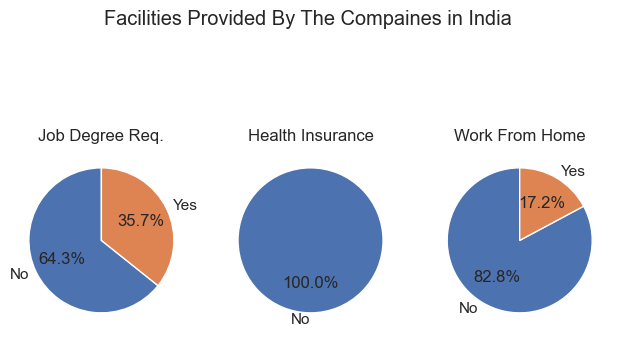

In [23]:
fig, axs = plt.subplots(1, 3)

dic = {
    'job_no_degree_mention' : 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance',
    'job_work_from_home' : 'Work From Home'
}

for i, (ind, titl) in  enumerate(dic.items()):
    (
        df_filtered_country[ind].
        value_counts().
        plot(
            kind= 'pie', 
            autopct= '%1.1f%%', 
            labels = ['No', 'Yes'],
            ax = axs[i],
            title= titl,
            startangle = 90,
            ylabel = ''
        )
    )
fig.tight_layout()
fig.suptitle(f'Facilities Provided By The Compaines in {country}')
plt.show()

In [24]:
df_filtered_plot = (
    df_filtered_country['company_name']
    .value_counts()
    .head(top)
    .to_frame()
    .copy()
)
df_filtered_plot

,count
company_name,
SAZ India,100
S&P Global,93
Confidential,82
Prometrics Solutions,72
PepsiCo,58
Maxgen Technologies Private Limited,57
JPMorgan Chase & Co.,53
JP Morgan Chase,51
Ovidtech Technologies,49


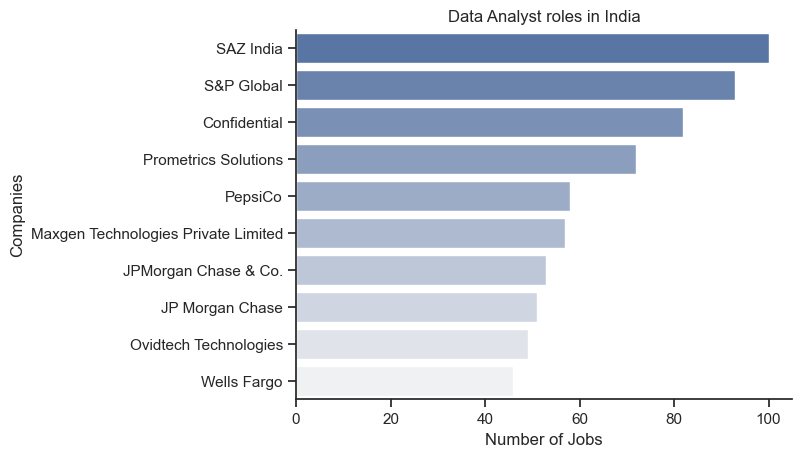

In [25]:
sns.barplot(
    data= df_filtered_plot, 
    x= 'count', 
    y= 'company_name',
    hue = 'company_name',
    palette= 'light:b_r',
)
plt.xlabel(f'Number of Jobs')
plt.ylabel(f'Companies')
plt.title(f'{job_type} roles in {country}')
sns.despine()
sns.set_theme(style= 'ticks')